Usefull (fun) links:
Great intuitive explanation of the Fourier series:
https://youtu.be/spUNpyF58BY

https://www.mathsisfun.com/algebra/eulers-formula.html
https://madhavuniversity.edu.in/maclaurins-theorem.html
https://www.mathsisfun.com/algebra/taylor-series.html

Why frequency domain filtering? For complex numbers, amplitudes get multiplied, angles get added
https://www.mathsisfun.com/algebra/complex-number-multiply.html
https://www.youtube.com/watch?v=5PcpBw5Hbwo
Convolution theorem: convolution in time domain equals point-wise multiplication in the frequency domain.

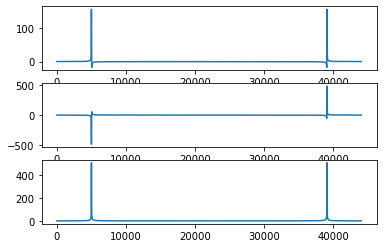

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 44100
t = np.arange(1024)/fs
freq = 5000
x = np.sin( 2*np.pi*freq*t )
y = np.fft.fft( x )

plt.subplot(311)
plt.plot( np.arange( y.size )/y.size*fs , y.real )
plt.subplot(312)
plt.plot( np.arange( y.size )/y.size*fs , y.imag )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(313)
plt.plot( np.arange( y.size )/y.size*fs , mag )
plt.savefig('figs/fft.png', dpi=300)
# TODO: mention why keeping the first half is important
# TODO: change bin size and show why it is useful

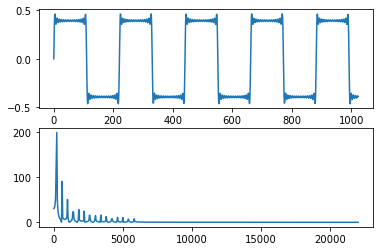

In [2]:
# composite waveform
import sounddevice as sd
fs = 44100
t = np.arange( fs )/fs
f1 = 200
a1 = 0.5
x = a1*np.sin( 2*np.pi*f1*t )
for i in range(3, 30, 2):
    f2 = f1*i
    a2 = a1/i
    x += a2*np.sin( 2*np.pi*f2*t )
sd.play( x , 44100 )
y = np.fft.fft( x[:1024] )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(211)
plt.plot( np.arange( 1024 ) , x[:1024] )
plt.subplot(212)
plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )
plt.savefig('figs/fft.png', dpi=300)
# TODO: mention why keeping the first half is important
# TODO: change bin size and show why it is useful

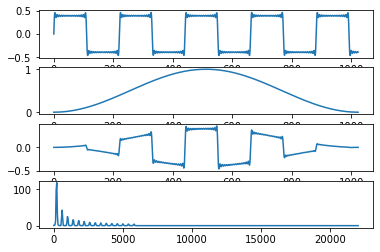

In [3]:
# apply window
w = np.hanning( 1024 )
x_windowed = w*x[:1024]
# TODO: matrix vs elementwise multiplication
y = np.fft.fft( x_windowed )
mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
plt.subplot(411)
plt.plot( np.arange( 1024 ) , x[:1024] )
plt.subplot(412)
plt.plot( np.arange( 1024 ) , w[:1024] )
plt.subplot(413)
plt.plot( np.arange( 1024 ) , x_windowed[:1024] )
plt.subplot(414)
plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )
plt.savefig('figs/fft.png', dpi=300)

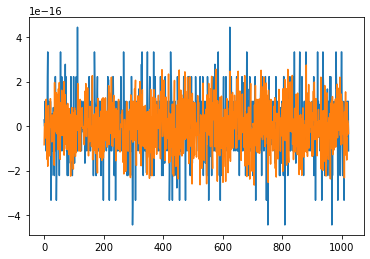

In [4]:
# inverse fft - ifft
fs = 44100
t = np.arange(1024)/fs
freq = 5000
x = np.sin( 2*np.pi*freq*t )
y = np.fft.fft( x )
x1 = np.fft.ifft( y )
plt.plot( np.arange( x.size ) , x1.real-x )
plt.plot( np.arange( x.size ) , x1.imag )

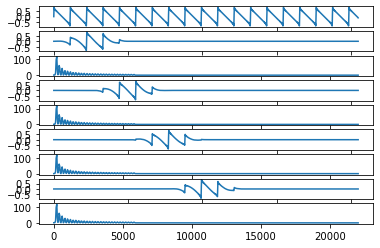

In [5]:
# towards spectrogram
fs = 44100
t = np.arange( fs )/fs
f1 = 200
a1 = 0.5
x = a1*np.sin( 2*np.pi*f1*t )
for i in range(2, 30, 1):
    f2 = f1*i
    # a2 = a1
    a2 = a1/i
    x += a2*np.sin( 2*np.pi*f2*t )

x_part = x[:4096]
w = np.hanning( 1024 )
hop_size = 512
plt.subplot(9,1,1)
plt.plot( np.arange(4096) , x_part )
for i in range(4):
    x_windowed = x_part[ (i*hop_size) : (i*hop_size + 1024) ]*w
    x_empty = np.zeros(4096)
    x_empty[ (i*hop_size) : (i*hop_size + 1024) ] = x_windowed
    y = np.fft.fft( x_windowed )
    mag = np.sqrt( np.power( y.real , 2 ) + np.power( y.imag , 2 ) )
    plt.subplot(9,1,2*i+2)
    plt.plot( np.arange( 4096 ) , x_empty )
    plt.subplot(9,1,2*i+3)
    plt.plot( np.arange( y.size//2 )/y.size*fs , mag[:y.size//2] )

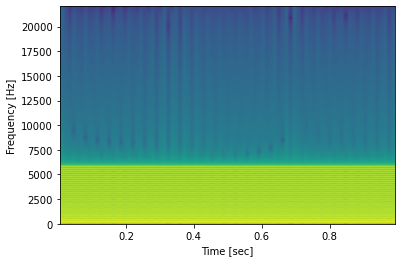

In [6]:
# import scipy.signal as sg

spectrogram, frequencies, times, im = plt.specgram(x, Fs=fs, noverlap=512, NFFT=1024)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig('figs/spec.png', dpi=300)

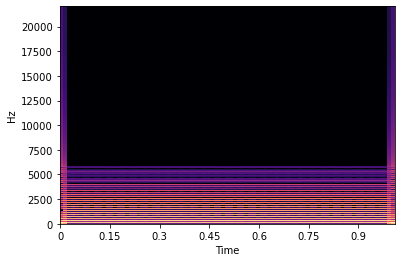

In [7]:
import librosa
import librosa.display

p = librosa.stft(x, n_fft=2048, hop_length=512)
d = librosa.amplitude_to_db( np.abs(p), ref=np.max )
librosa.display.specshow(d, sr=fs, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_lbrs.png', dpi=300)

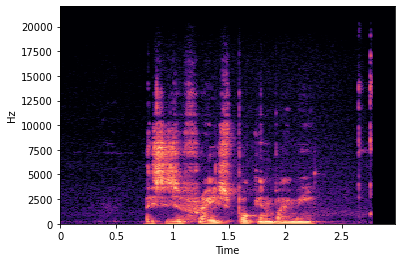

In [20]:
# http://www.cstr.ed.ac.uk/projects/eustace/download.html
# say -o test_file.aiff this is a phrase spoken by me
x, sr = librosa.load('audio_files/human_speech_1.aif', sr=44100)
# x, sr = librosa.load('audio_files/artificial_speech_1.aif', sr=44100)
p = librosa.stft(x, n_fft=2048, hop_length=512)
d = librosa.amplitude_to_db( np.abs(p), ref=np.max )
librosa.display.specshow(d, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_lbrs.png', dpi=300)
# listen to segment
sd.play( x , 44100 )

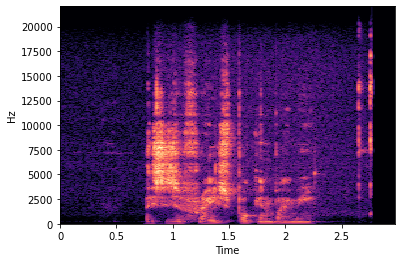

In [33]:
# signal domain fir filter
# high pass filter
x_tf1 = np.copy( x )
x_d1 = 0
a = 0.5
for i in range(x_tf1.size):
    x_tf1[i] = a*x[i] - (1-a)*x_d1
    if i > 0:
        x_d1 = x[i]
# or in numpy annotation
# x_tf1[1:] = x_tf1[i] - x_tf1[:-1]
sd.play( x_tf1 , 44100 )

p_tf1 = librosa.stft(x_tf1, n_fft=2048, hop_length=512)
d_tf1 = librosa.amplitude_to_db( np.abs(p_tf1), ref=np.max )
librosa.display.specshow(d_tf1, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_tf1.png', dpi=300)

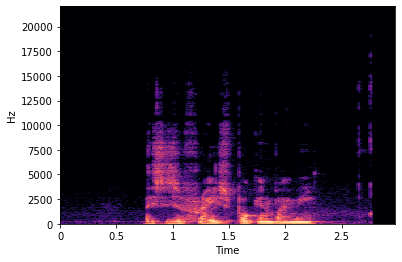

In [25]:
# signal domain iir filter
# low pass filter
x_tf2 = np.copy( x )
y_d1 = 0
a = 0.1
for i in range(1, x_tf1.size, 1):
    x_tf2[i] = a*x[i] + (1-a)*y_d1
    if i > 0:
        y_d1 = x_tf2[i]

sd.play( x_tf2 , 44100 )

p_tf2 = librosa.stft(x_tf2, n_fft=2048, hop_length=512)
d_tf2 = librosa.amplitude_to_db( np.abs(p_tf2), ref=np.max )
librosa.display.specshow(d_tf2, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_tf2.png', dpi=300)

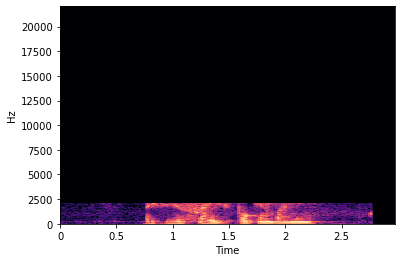

In [59]:
# frequency domain hard low pass
p_ff1 = librosa.stft(x, n_fft=2048, hop_length=512)
# cut all frequencies above bin 100
p_ff1[100:, :] = 0
d_ff1 = librosa.amplitude_to_db( np.abs(p_ff1), ref=np.max )
librosa.display.specshow(d_ff1, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_ff1.png', dpi=300)

x_ff1 = librosa.istft(p_ff1, hop_length=512)

sd.play( x_ff1 , 44100 )

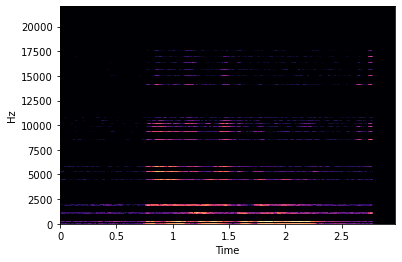

In [66]:
# frequency domain random frequency hard cancellation
p_ff2 = librosa.stft(x, n_fft=2048, hop_length=512)
# cut all frequencies in random bins of given proporsions
mask = np.ones(p_ff2.shape[0])
mask[:100] = 0
np.random.shuffle(mask)
p_ff2[ mask.astype(bool) , :] = 0
d_ff2 = librosa.amplitude_to_db( np.abs(p_ff2), ref=np.max )
librosa.display.specshow(d_ff2, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_ff2.png', dpi=300)

x_ff2 = librosa.istft(p_ff2, hop_length=512)

sd.play( x_ff2 , 44100 )

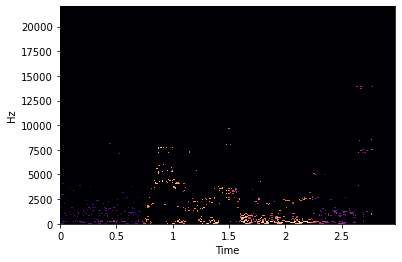

In [81]:
# frequency domain hard cancellation of weak frequencies
p_ff3 = librosa.stft(x, n_fft=2048, hop_length=512)
# cut all frequencies in random bins of given proporsions
# mask = np.ones(p_ff3.shape)
for i in range(p_ff3.shape[1]):
    tmp_col = np.copy( np.abs(p_ff3[:,i]) )
    tmp_col.sort()
    tmp_threshold = tmp_col[-50]
    p_ff3[ p_ff3[:,i] <= tmp_threshold , i ] = 0
# p_ff3[ mask.astype(bool) ] = 0
d_ff3 = librosa.amplitude_to_db( np.abs(p_ff3), ref=np.max )
librosa.display.specshow(d_ff3, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_ff3.png', dpi=300)

x_ff3 = librosa.istft(p_ff3, hop_length=512)

sd.play( x_ff3 , 44100 )

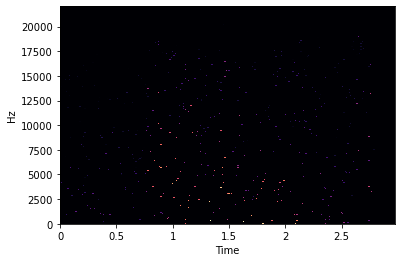

In [85]:
# frequency domain all random frequency hard cancellation
p_ff4 = librosa.stft(x, n_fft=2048, hop_length=512)
# cut all frequencies in random bins of given proporsions
for i in range(p_ff4.shape[1]):
    mask = np.ones(p_ff4.shape[0])
    mask[ :10 ] = 0
    np.random.shuffle(mask)
    p_ff4[ mask.astype(bool) , i ] = 0
d_ff4 = librosa.amplitude_to_db( np.abs(p_ff4), ref=np.max )
librosa.display.specshow(d_ff4, sr=sr, x_axis='time', y_axis='linear')
plt.savefig('figs/spec_ff4.png', dpi=300)

x_ff4 = librosa.istft(p_ff4, hop_length=512)

sd.play( x_ff4 , 44100 )

/Users/max/opt/anaconda3/envs/audio_courses/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2686: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


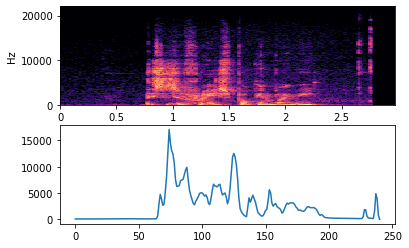

In [91]:
import scipy.stats as sc

p = librosa.stft(x, n_fft=2048, hop_length=512)

ent = np.zeros( p.shape[1] )
for i in range( p.shape[1] ):
    ent[i] = sc.entropy( np.abs(p[:,i]) )*np.sum( np.abs(p[:,i]) )

p_ff4 = librosa.stft(x, n_fft=2048, hop_length=512)
d_ff4 = librosa.amplitude_to_db( np.abs(p_ff4), ref=np.max )

plt.subplot(211)
librosa.display.specshow(d_ff4, sr=sr, x_axis='time', y_axis='linear')
plt.subplot(212)
plt.plot( np.arange( ent.size ) , ent )